In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import os
import re

ordinal_suffix = lambda n: "%d%s" % (n, "tsnrhtdd"[(n//10%10!=1)*(n%10<4)*n%10::4]) #最初で111等をthに設定， 次で11, 12, 13を除外，次で1の位が0, 1, 2, 3の時にth, st, nd, rdを返す

## 読み込み

In [22]:
traj = np.load("../generated_lam/sync_gen_laminar_epsilon0.039_a0.165_c10_f0.2_omega0.95-0.99_t1000002000check100progress10^-16-10^-9perturb.npy")

## 2軸プロット

In [ ]:
plotDim1 = 0    
plotDim2 = 3

plt.plot(traj[plotDim1, :], traj[plotDim2, :], 'o', markersize=1)

## 相空間(2つ)

In [ ]:
#3dプロット
fig = plt.figure(dpi=600)
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(traj[0, :], traj[1, :], traj[2, :], lw=0.1)
# ax1.set_zlim(0, 10)
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(traj[3, :], traj[4, :], traj[5, :], lw=0.1)
plt.show()


## 相空間(２つ)　z軸回転アニメーション

In [ ]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Plot the data
line1, = ax1.plot(traj[0, :], traj[1, :], traj[2, :], lw=0.1)
line2, = ax2.plot(traj[3, :], traj[4, :], traj[5, :], lw=0.1)

# Function to update the plot for each frame
def update(frame):
    ax1.view_init(elev=30, azim=frame)  # Rotate around z-axis
    ax2.view_init(elev=30, azim=frame)  # Rotate around z-axis

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(0, 360, 20), interval=100)
# ani.save('animation.mp4', writer='ffmpeg', fps=30)
HTML(ani.to_jshtml())

## リアプノフ指数の比較

### テキストファイルからデータを読み込む

In [14]:
# "../lyapunov/" から.txtファイルを全て読み込む
directory = "../lyapunov/"
files = os.listdir(directory)
files_file = [f for f in files if os.path.isfile(os.path.join(directory, f))]
files_txt = [f for f in files_file if f[-4:] == '.txt']

# ファイル名からepsilonの後ろの数字と，最後の_と.txtの間の文字列を取得
epsilons = []
lyapunov_exponents = np.zeros((6, len(files_txt)))
categories = []
i = 0 # ファイルのインデックス
for f in files_txt:
    epsilon = re.search(r'epsilon(\d+\.\d+)_', f)
    epsilons.append(float(epsilon.group(1)))
    category = re.search(r'.*_(.+).txt', f)
    if "omega" in category.group(1): # omegaの値が入っている場合は空白に置き換える
        categories.append("")
    else:
        categories.append(category.group(1))
    lyapunov_exponents[:, i] = np.loadtxt(directory + f)
    i += 1
    
# epsilonの値でソート
epsilons = np.array(epsilons)
lyapunov_exponents = lyapunov_exponents[:, epsilons.argsort()]
categories = np.array(categories)[epsilons.argsort()]
epsilons = epsilons[epsilons.argsort()]

# laminarかつepsilonが0.0416以上のインデックスをlaminarに，それ以外をothersに格納
laminar = []
other = []
for i in range(len(categories)):
    if categories[i] == "laminar" or epsilons[i] > 0.0416:
        laminar.append(i)
    else:
        other.append(i)

### ラミナーバーストごとに各εに対してNthリアプノフ指数をプロット

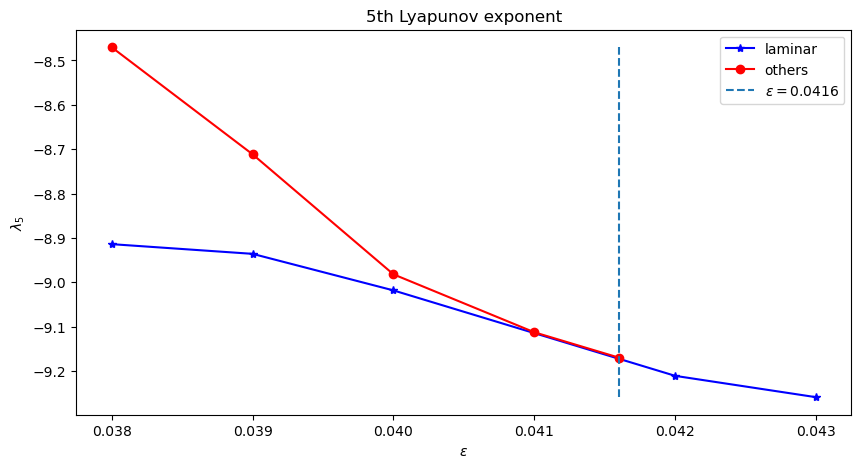

In [21]:
order = 5
fig, ax = plt.subplots(figsize=(10, 5))
ax.title.set_text(f"{ordinal_suffix(order)} Lyapunov exponent")
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(fr"$\lambda_{order}$")
ax.plot(epsilons[laminar], lyapunov_exponents[order - 1,laminar], "-*", c="b", label="laminar")
ax.plot(epsilons[other], lyapunov_exponents[order - 1, other], "-o", c="r", label="others")
ax.vlines(0.0416, min(lyapunov_exponents[order - 1,]), max(lyapunov_exponents[order - 1,]), linestyles='dashed', label=r"$\epsilon=0.0416$")
plt.legend()